In [1]:
#pip install plotnine

## Import Dependencies

In [2]:
import numpy as np
import pandas as pd

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotnine import ggplot,aes, geom_bar, labs, theme_minimal, geom_abline, geom_point, geom_text
import statsmodels.api as sm

In [4]:
mkt_df =\
(
    pd\
    .read_excel('market_portfolio.xlsx'
               )
)

ind_df =\
(
    pd
    .read_excel("Industry_Portfolios.xlsx"
               )
)

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed


In [5]:
mkt_df.T

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
Date,200401.00,200402.00,200403.00,200404.00,200405.00,200406.00,200407.00,200408.00,200409.00,200410.00,...,201303.00,201304.00,201305.00,201306.00,201307.00,201308.00,201309.00,201310.00,201311.00,201312.00
Market,2.22,1.46,-1.23,-1.75,1.23,1.94,-3.97,0.19,1.71,1.54,...,4.03,1.56,2.81,-1.21,5.66,-2.69,3.76,4.17,3.12,2.81


In [6]:
ind_df.T

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
Date,200401.00,200402.00,200403.00,200404.00,200405.00,200406.00,200407.00,200408.00,200409.00,200410.00,...,201303.00,201304.00,201305.00,201306.00,201307.00,201308.00,201309.00,201310.00,201311.00,201312.00
NoDur,0.06,4.25,-0.09,1.42,-1.89,1.66,-5.98,0.77,-2.01,2.82,...,5.13,3.60,-2.35,0.14,2.95,-4.00,1.94,4.75,1.29,2.65
Durbl,-1.07,-0.07,-1.15,2.30,-1.64,5.05,-4.69,-2.31,2.44,-2.66,...,4.02,3.58,9.89,-0.47,9.16,-1.00,6.46,0.72,1.81,1.18
Manuf,-0.62,1.95,-0.27,-0.17,1.61,5.34,-4.02,1.27,1.92,-1.42,...,2.74,0.66,3.59,-1.89,6.15,-1.95,5.20,4.56,2.95,3.13
Enrgy,0.44,4.69,-0.13,2.52,0.39,5.56,3.24,-1.27,8.94,0.66,...,2.14,-1.37,3.03,-2.40,5.02,-1.83,2.03,4.86,0.85,2.95
HiTec,4.53,-2.92,-2.55,-4.91,4.85,2.62,-8.50,-4.40,3.33,5.03,...,2.67,0.49,4.55,-3.05,5.82,-0.12,3.77,3.80,3.65,4.04
Telcm,1.41,-0.52,-2.07,-0.48,-2.95,0.82,-1.09,1.13,1.39,3.46,...,5.44,4.40,-1.99,1.78,3.41,-3.28,4.33,5.52,0.27,3.96
Shops,0.45,6.09,0.29,-2.70,0.30,0.04,-4.03,-1.20,2.61,3.06,...,4.62,2.81,2.22,-0.08,5.98,-4.21,4.46,5.08,3.67,0.20
Hlth,3.09,0.89,-3.96,3.54,-0.42,-0.49,-5.95,1.63,-1.37,-2.42,...,6.56,2.60,1.88,-1.44,8.04,-3.49,4.19,3.47,4.54,0.71
Utils,1.92,2.07,1.13,-3.55,1.28,2.01,1.06,3.66,1.42,4.22,...,5.55,5.12,-7.09,0.78,4.60,-4.43,1.05,3.35,-1.81,1.79


In [7]:
ind_df["Date"]=\
(
    ind_df
    .Date
    .apply(lambda x: str(x)
          )
)

ind_df["Date"]=\
(
    pd
    .to_datetime(ind_df.Date,
                 format="%Y%m"
                )
)

ind_df =\
(
    ind_df
    .set_index("Date")
)

In [8]:
mkt_df['Date']=\
(
    mkt_df
    .Date
    .apply(lambda x: str(x)
          )
)

mkt_df['Date']=\
(
    pd
    .to_datetime(mkt_df.Date,
                 format = "%Y%m"
                )
)

mkt_df =\
(
    mkt_df
    .set_index("Date"
              )
)

In [9]:
ind_df =\
(
    ind_df
    .reset_index()
)

In [10]:
ind_df

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,2004-01-01,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,2004-02-01,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,2004-03-01,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,2004-04-01,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,2004-05-01,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...
115,2013-08-01,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,2013-09-01,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,2013-10-01,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,2013-11-01,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [11]:
mkt_df =\
(
    mkt_df
    .reset_index()
)

In [12]:
mkt_df.T

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
Date,2004-01-01 00:00:00,2004-02-01 00:00:00,2004-03-01 00:00:00,2004-04-01 00:00:00,2004-05-01 00:00:00,2004-06-01 00:00:00,2004-07-01 00:00:00,2004-08-01 00:00:00,2004-09-01 00:00:00,2004-10-01 00:00:00,...,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00
Market,2.22,1.46,-1.23,-1.75,1.23,1.94,-3.97,0.19,1.71,1.54,...,4.03,1.56,2.81,-1.21,5.66,-2.69,3.76,4.17,3.12,2.81


In [13]:
rf_rt = 0.13

In [14]:
ind =\
(
    ind_df
    .columns [1:]
)

In [15]:
mkt_df['mkt_ex_ret'] =\
(
    mkt_df['Market'] - rf_rt
)

In [16]:
for i in ind:
    ind_df[f'{i}_ex_ret'] = ind_df[i] - rf_rt

In [17]:
mkt_ind_dt =\
(
    pd
    .merge(mkt_df[['Date', 'mkt_ex_ret']],
           ind_df, 
           on='Date'
          )
)

In [18]:
results = []

for i in ind:
    ind_excess = f'{i}_ex_ret'
    X = mkt_ind_dt['mkt_ex_ret']
    y = mkt_ind_dt[ind_excess]
    
    X =\
        sm\
        .add_constant(X)
    
    model =\
        sm\
        .OLS(y, X).fit()
    
    alpha =\
        model\
        .params['const']
    
    beta =\
        model\
        .params['mkt_ex_ret']
    
    results\
        .append({'Industry': i,
                 'Alpha': alpha,
                 'Beta': beta
                })

In [19]:
results_df =\
(
    pd
    .DataFrame(results)
)

results_df

,Industry,Alpha,Beta
0,NoDur,0.369443,0.652647
1,Durbl,-0.415599,1.648536
2,Manuf,0.159771,1.169846
3,Enrgy,0.501719,0.969850
4,HiTec,-0.064020,1.132969
5,Telcm,0.194691,0.900729
6,Shops,0.275492,0.826492
7,Hlth,0.237841,0.673036
8,Utils,0.444585,0.538086
9,Other,-0.387135,1.207309


/var/folders/3x/bb4zz1_x2xj63kgdx9trqbsr0000gn/T/ipykernel_12547/894953464.py:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


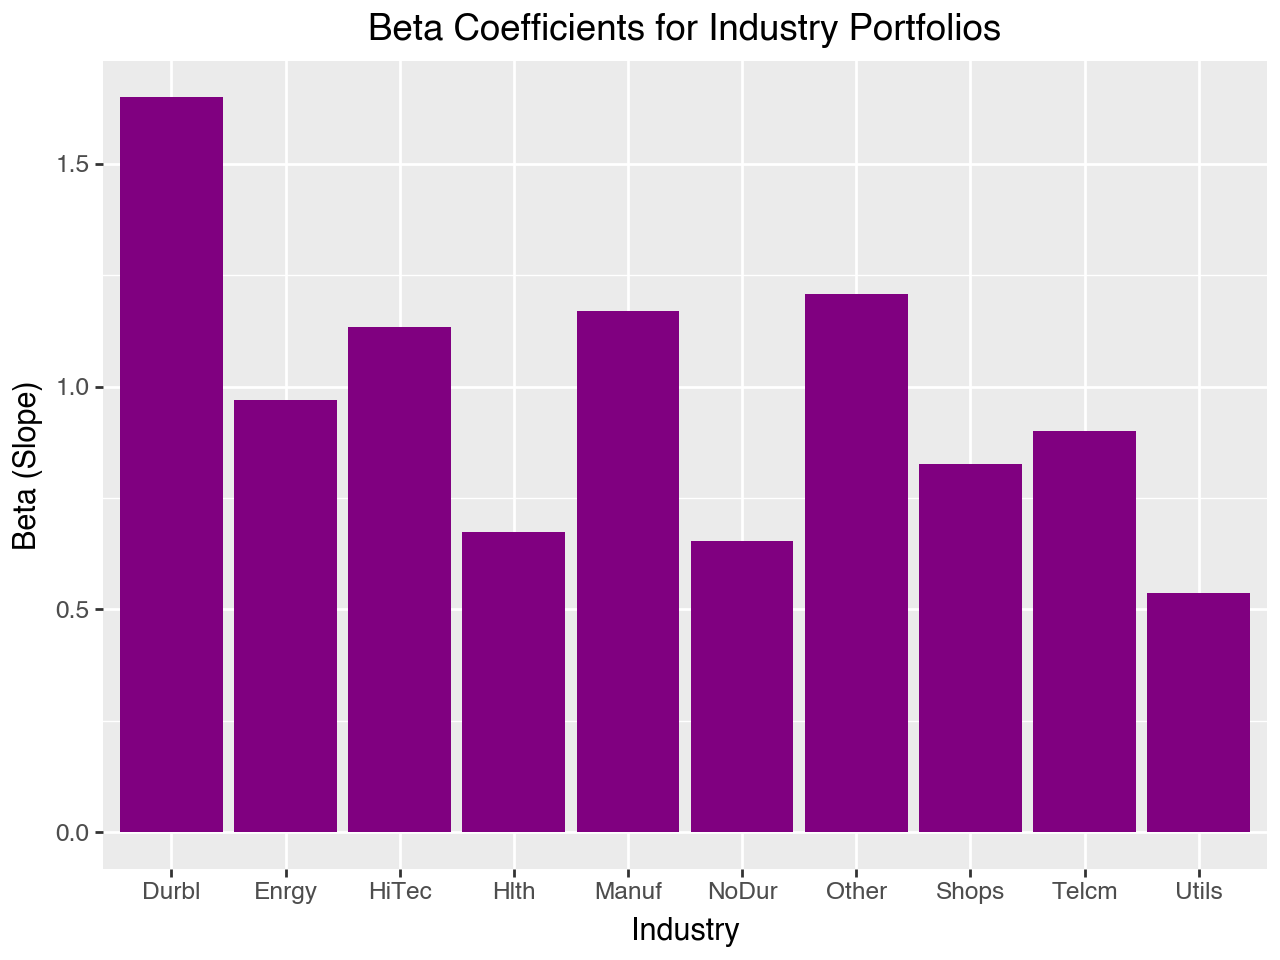

In [20]:
plot_beta =\
(
    ggplot(results_df,
           aes(x = 'Industry',
               y = 'Beta'
              )
          )
        + geom_bar(stat = 'identity',
                   fill = 'purple'
                  )
        + labs(title = 'Beta Coefficients for Industry Portfolios',
               x = 'Industry',
               y = 'Beta (Slope)'
              )
)

print(plot_beta)

/var/folders/3x/bb4zz1_x2xj63kgdx9trqbsr0000gn/T/ipykernel_12547/588019352.py:18: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


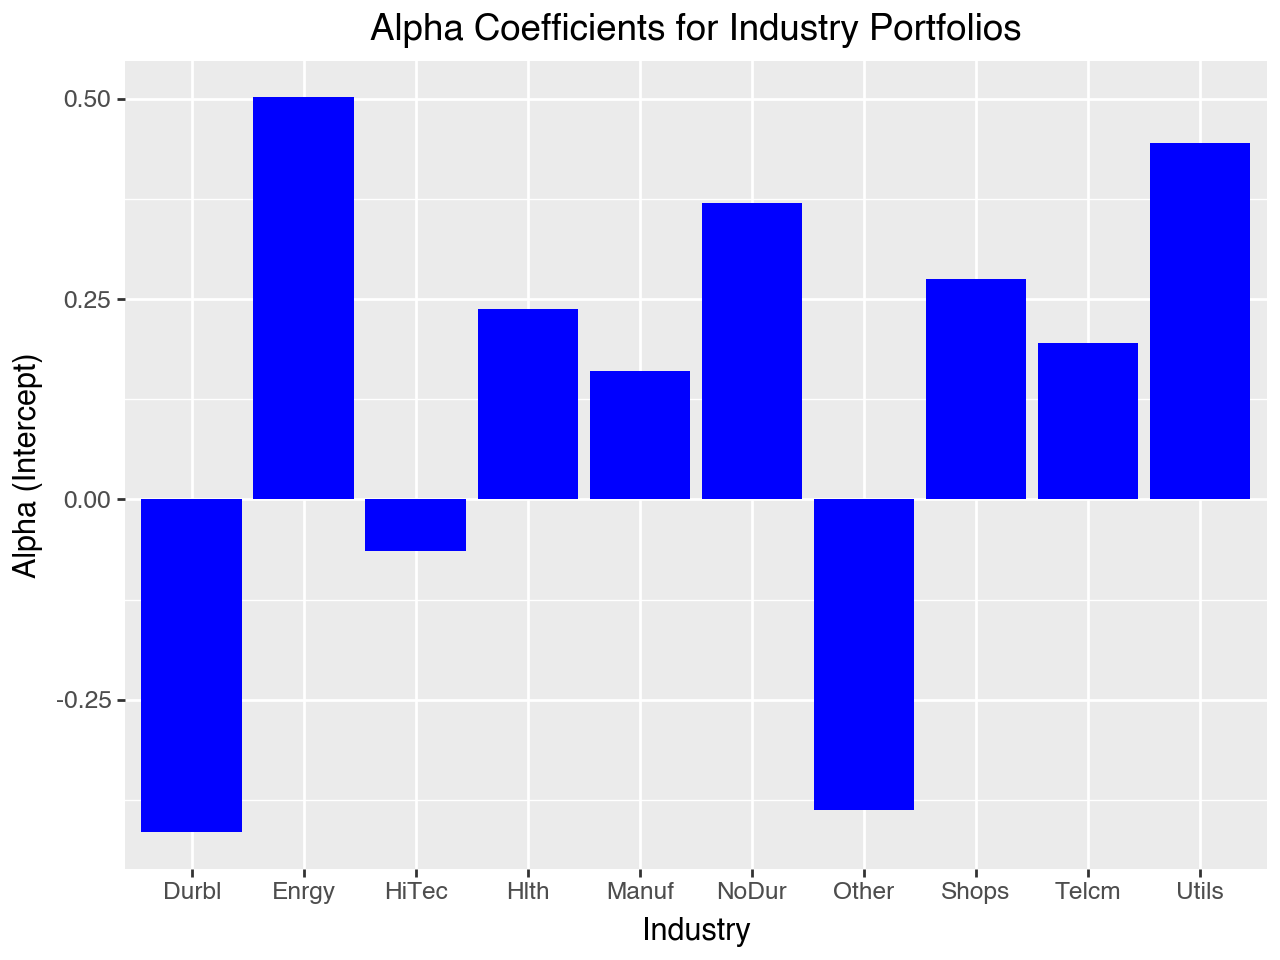

In [21]:
plot_alpha =\
(
    ggplot(results_df,
           aes(x='Industry',
               y='Alpha'
              )
          )
        + geom_bar(stat='identity',
                   fill='blue'
                  )
        + labs(title='Alpha Coefficients for Industry Portfolios',
               x='Industry',
               y='Alpha (Intercept)'
              )
        
)

print(plot_alpha)

In [22]:
df = pd.concat([ind,mkt], axis=0)
df = df.mean().to_frame().rename(columns={0:"mean_monthly_returns"})
df = pd.concat([df, MarketModel.Beta], axis=1).fillna({"Beta":1})
Out[3]:
In [17]:
model = LinearRegression()
model.fit(df.Beta.to_numpy().reshape(-1,1), df.mean_monthly_returns.to_numpy().reshape(-1,1))
Beta = np.linspace(0, 2, df.shape[1]).reshape(-1,1)
Rhat = model.predict(Beta)

SyntaxError: invalid syntax (167819894.py, line 4)

In [23]:
market_beta = 1

ind_beta =\
(
    results_df[['Industry', 'Beta']]
)

ind_beta

,Industry,Beta
0,NoDur,0.652647
1,Durbl,1.648536
2,Manuf,1.169846
3,Enrgy,0.969850
4,HiTec,1.132969
5,Telcm,0.900729
6,Shops,0.826492
7,Hlth,0.673036
8,Utils,0.538086
9,Other,1.207309


In [24]:
add_mkt_beta =\
(
    pd
    .DataFrame({'Industry': ['Market'],
                'Beta': [market_beta]})
)

add_mkt_beta

,Industry,Beta
0,Market,1


In [25]:
comb_beta =\
(
    pd
    .concat([ind_beta, add_mkt_beta], ignore_index=True)
)

comb_beta

,Industry,Beta
0,NoDur,0.652647
1,Durbl,1.648536
2,Manuf,1.169846
3,Enrgy,0.969850
4,HiTec,1.132969
5,Telcm,0.900729
6,Shops,0.826492
7,Hlth,0.673036
8,Utils,0.538086
9,Other,1.207309


In [26]:
mean_ret = {}

for i in ind:
    mean_ret[i] =\
        ind_df[i]\
        .mean()
    
mean_ret

{'NoDur': 0.9028333333333334,
 'Durbl': 0.7333333333333332,
 'Manuf': 1.0128333333333335,
 'Enrgy': 1.2311666666666667,
 'HiTec': 0.7662499999999999,
 'Telcm': 0.8814166666666666,
 'Shops': 0.9163333333333336,
 'Hlth': 0.7838333333333334,
 'Utils': 0.9071666666666667,
 'Other': 0.48908333333333326}

In [27]:
mean_ret['Market'] =\
(
    mkt_df
    ['Market']
    .mean()
)

mean_ret

{'NoDur': 0.9028333333333334,
 'Durbl': 0.7333333333333332,
 'Manuf': 1.0128333333333335,
 'Enrgy': 1.2311666666666667,
 'HiTec': 0.7662499999999999,
 'Telcm': 0.8814166666666666,
 'Shops': 0.9163333333333336,
 'Hlth': 0.7838333333333334,
 'Utils': 0.9071666666666667,
 'Other': 0.48908333333333326,
 'Market': 0.7480833333333332}

In [28]:
mean_ret_df =\
(
    pd
    .DataFrame(list(mean_ret.items()),
               columns = ['Industry',
                          'Mean_mth_Return',
                         ]
              )
)

mean_ret_df

,Industry,Mean_mth_Return
0,NoDur,0.902833
1,Durbl,0.733333
2,Manuf,1.012833
3,Enrgy,1.231167
4,HiTec,0.766250
5,Telcm,0.881417
6,Shops,0.916333
7,Hlth,0.783833
8,Utils,0.907167
9,Other,0.489083


In [29]:
regr_df =\
(
    comb_beta
    [['Industry', 'Beta']]
    .merge(mean_ret_df,
           on = 'Industry'
          )
)

regr_df

,Industry,Beta,Mean_mth_Return
0,NoDur,0.652647,0.902833
1,Durbl,1.648536,0.733333
2,Manuf,1.169846,1.012833
3,Enrgy,0.969850,1.231167
4,HiTec,1.132969,0.766250
5,Telcm,0.900729,0.881417
6,Shops,0.826492,0.916333
7,Hlth,0.673036,0.783833
8,Utils,0.538086,0.907167
9,Other,1.207309,0.489083


In [30]:
X =\
(
    regr_df
    ['Beta']
)

y =\
(
    regr_df
    ['Mean_mth_Return']
)

In [31]:
X =\
(
    sm
    .add_constant(X)
)

In [32]:
sml =\
(
    sm
    .OLS(y,
         X
        )
    .fit()
)

In [33]:
sml_intcpt =\
(
    sml
    .params
    ['const']
)

sml_slope =\
(
    sml
    .params
    ['Beta']
)

beta_range =\
(
    np
    .linspace(0,
              2, 
              100)
)

sml_val =\
(
    sml_intcpt
    +
    sml_slope
    *
    beta_range
)

In [34]:
sml_df =\
(
    pd
    .DataFrame({'Beta': beta_range,
                'SML_Value': sml_val})
)

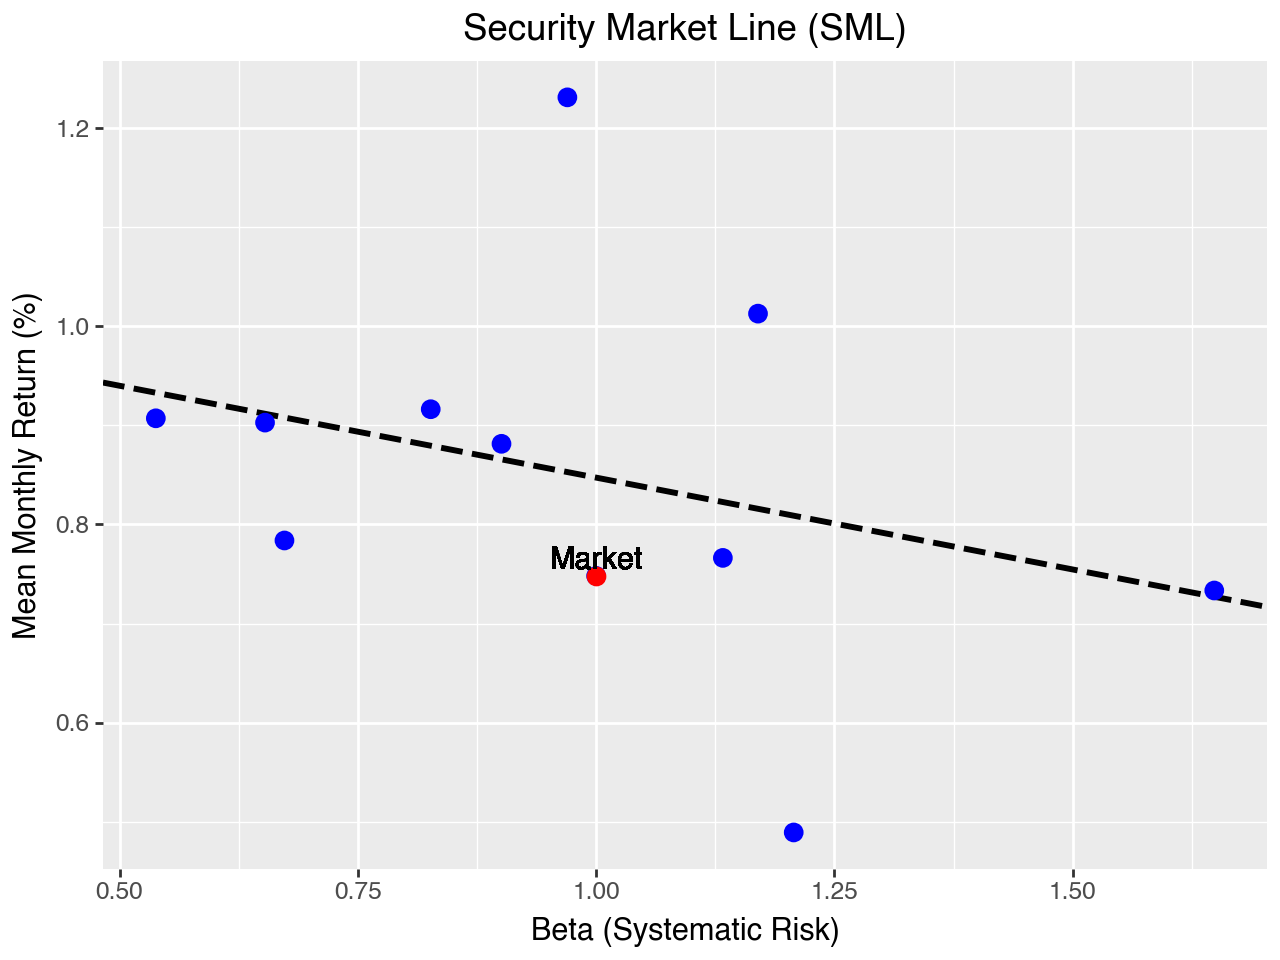

In [35]:
S_M_L =\
(
    ggplot(sml_df,
           aes(x = 'Beta',
               y = 'SML_Value')
          )
    
    + geom_abline(intercept = sml_intcpt,
                  slope = sml_slope, 
                  linetype = 'dashed', 
                  size = 1.2)
    
    + geom_point(aes(x = 'Beta',
                     y = 'Mean_mth_Return'), 
                 data = regr_df, 
                 color = 'blue', 
                 size = 3)
    
    + geom_point(aes(x = 'Beta',
                     y = 'Mean_mth_Return'),
                 data = regr_df[regr_df['Industry'] == 'Market'],
                 color = 'red',
                 size = 3,
                 #label = 'Market'
                )
    
    + geom_text(aes(x=regr_df[regr_df
                              ['Industry'] == 'Market']['Beta'].values[0],
                    y=regr_df[regr_df
                              ['Industry'] == 'Market']['Mean_mth_Return'].values[0]
                   ),
                label='Market',
                color='black', 
                va='bottom')
                         
    + labs(title='Security Market Line (SML)', 
           x='Beta (Systematic Risk)', 
           y='Mean Monthly Return (%)')
)

S_M_L

In [36]:
print(sml.summary())

                            OLS Regression Results                            
Dep. Variable:        Mean_mth_Return   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9679
Date:                Sun, 29 Sep 2024   Prob (F-statistic):              0.351
Time:                        22:03:01   Log-Likelihood:                 3.9339
No. Observations:                  11   AIC:                            -3.868
Df Residuals:                       9   BIC:                            -3.072
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0328      0.192      5.374      0.0

/Users/nasruddinislambinramli/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
